# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut

- Nama: Dewi Wahidatul Karimah
- Email: dewikarimah780@gmail.com
- Id Dicoding: dewi_karimah

## Persiapan

### Menyiapkan library yang dibutuhkan

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import  classification_report,confusion_matrix
from joblib import dump

### Menyiapkan data yang akan diguankan

## Data Understanding

In [68]:
# data loading
df = pd.read_csv('data.csv')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [69]:
# Cek jumlah nilai null
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


tidak terdapat data yang bernilai null

In [70]:
# Mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Tidak terdapat keanehan dari tipe data yang digunakan

In [71]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### EDA

In [72]:
data = df.copy()
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


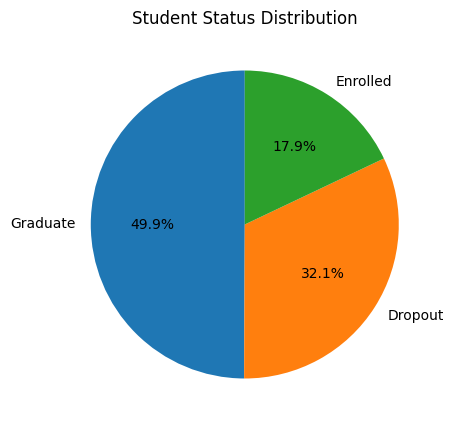

In [73]:
# Melihat persebran data target
status_counts = data['Status'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Student Status Distribution')
plt.show()

Dari grafik dapat kita ketahui 
- jumlah siswa yang lulus lebih banyak daripada kategori yang lain.
- data terindikasi data tidak seimbang (imbalance)

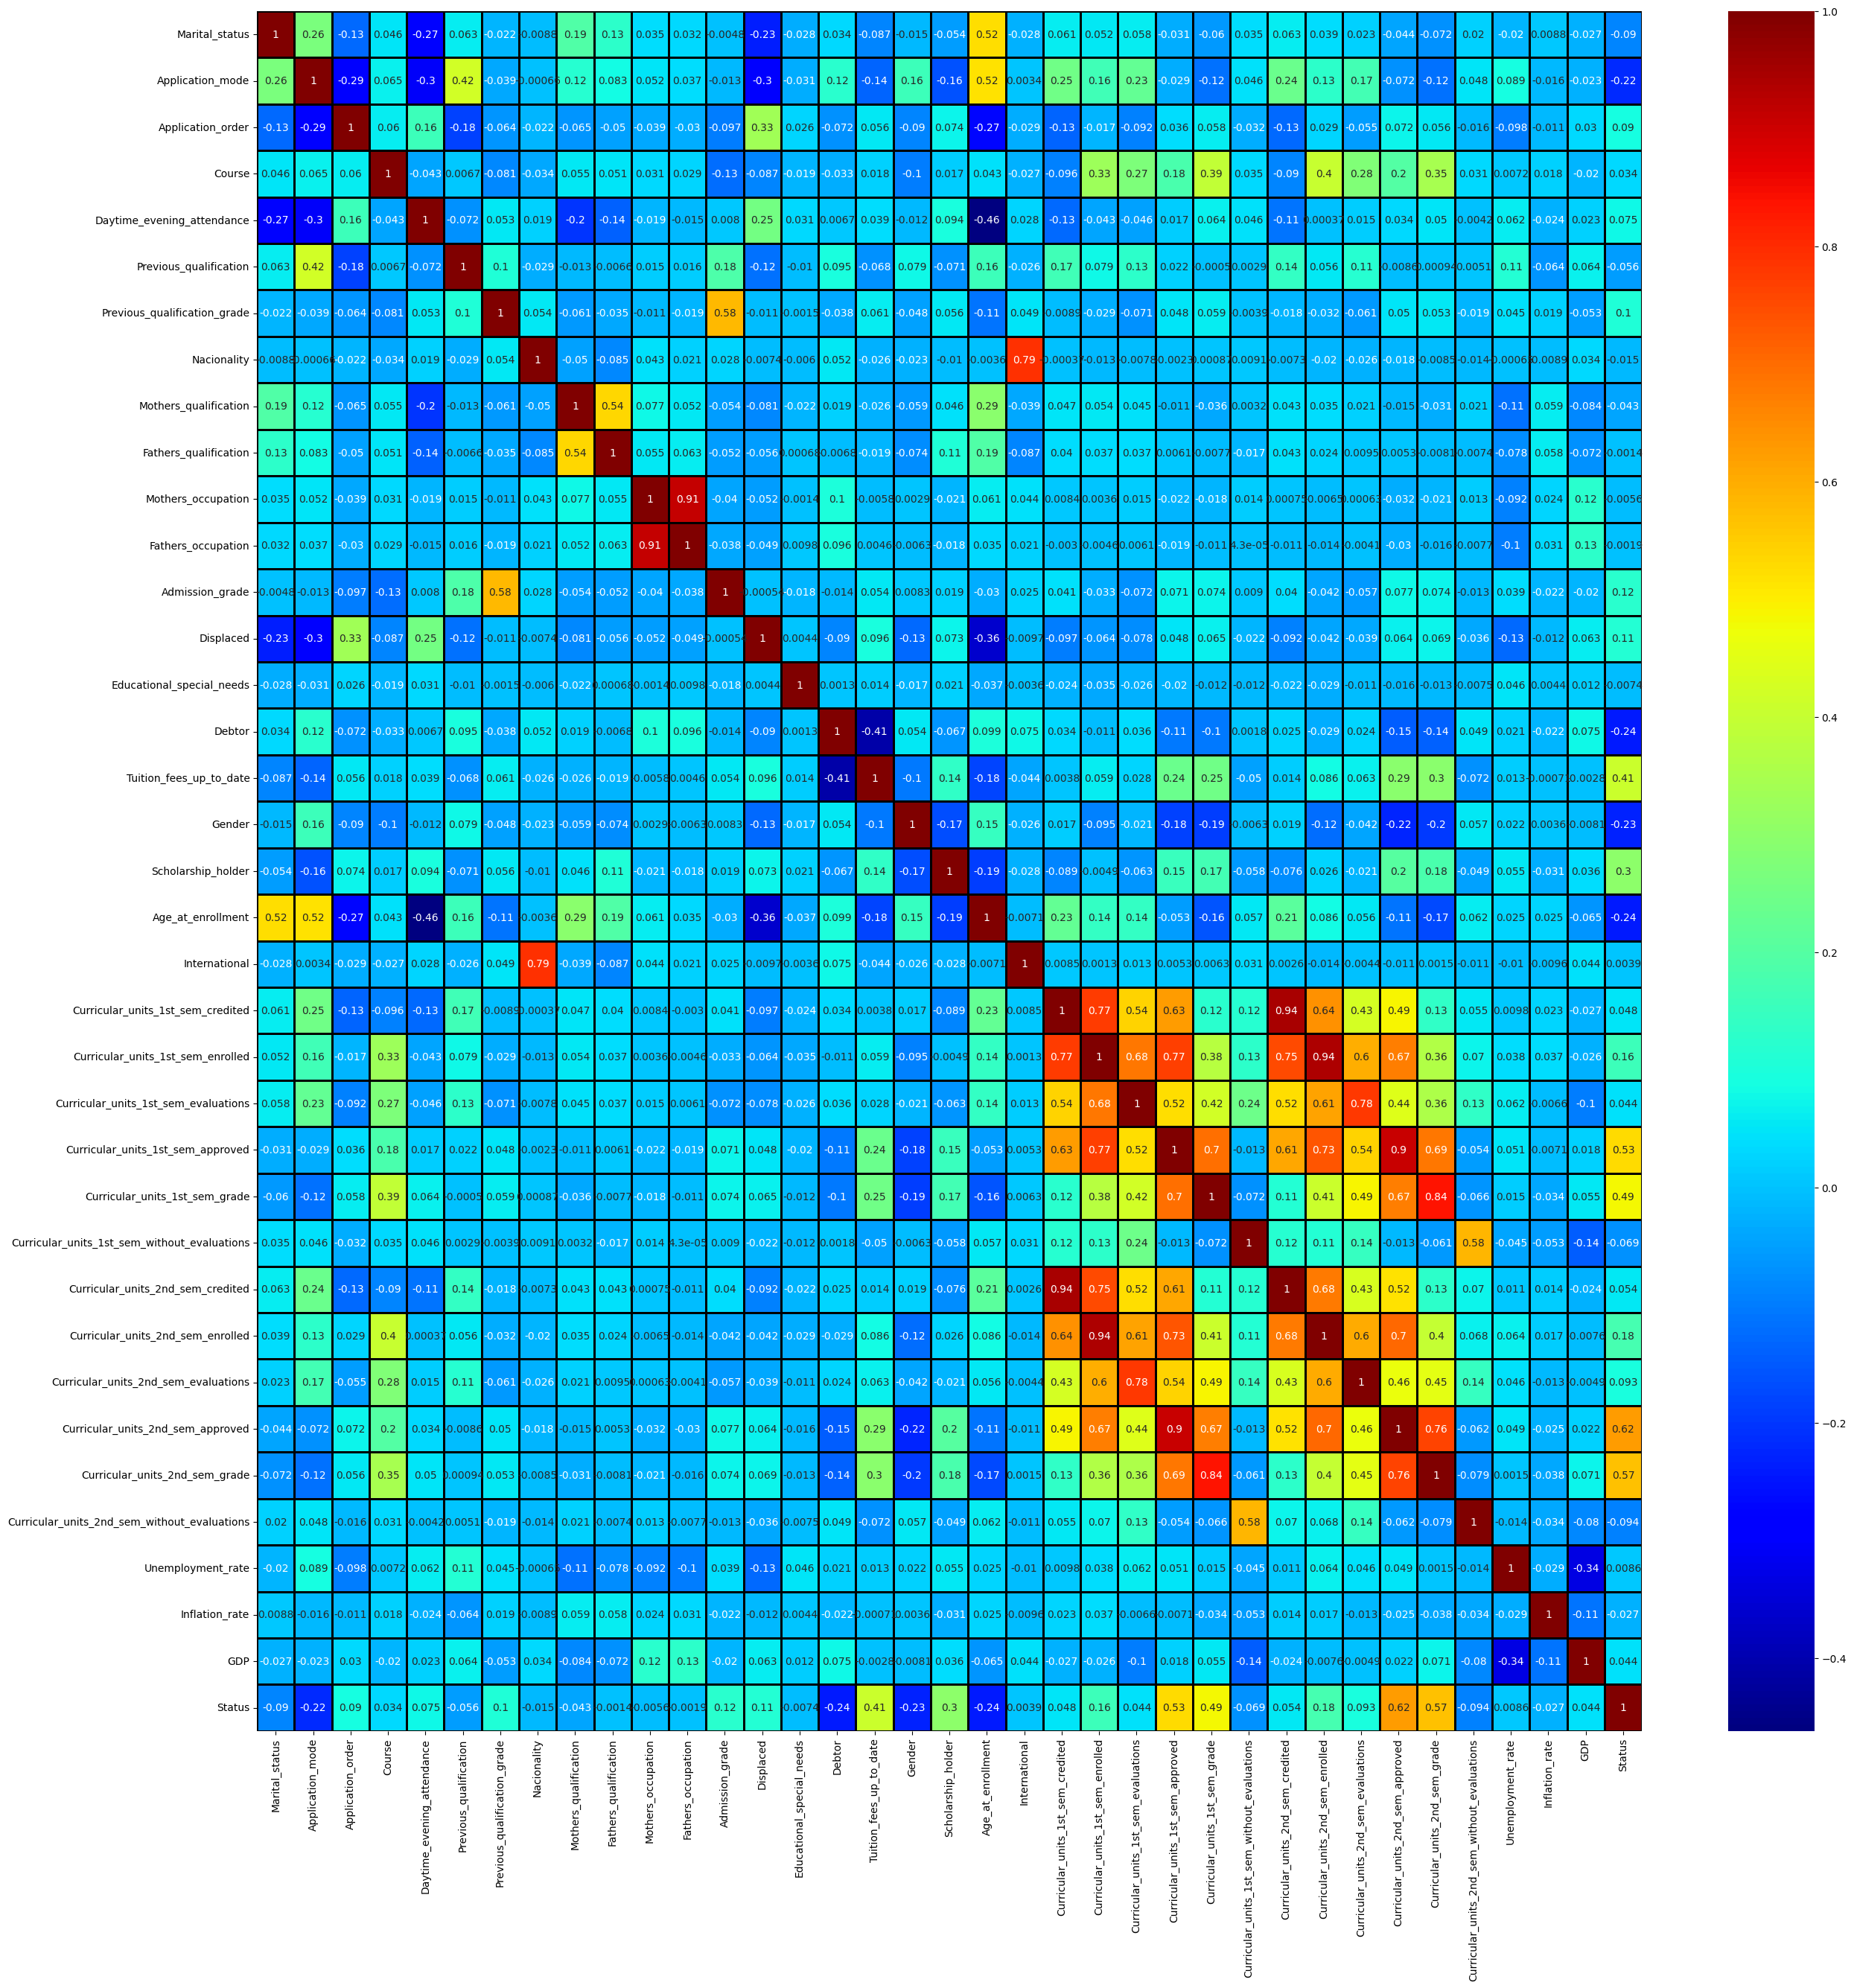

In [74]:
# Melihat korelasi seluruh fitur terhadap kolom target yakni status
# Mengubah kolom status menjadi numerik
encode = LabelEncoder()
data.loc[:,'Status'] = encode.fit_transform(data['Status'])

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

Dari korelasi matrik dapat kita ketahui bahwa:
- Fitur Curricular_units_1st_sem_approved, Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_approved, dan Curricular_units_2nd_sem_grade memiliki korelasi yang cukup kuat dengan fitur Status dibandingkan dengan yang lain.
- Fitur Scholarship_holder dan Tuition_fees_up_to_date memiliki korelasi yang sedang.
- Fitur Age_at_enrollment dan Debtor memiliki korelasi paling lemah dengan fitur Status dibandingkan yang lain.

## Data Preparation / Preprocessing

In [75]:
# Feature selection (mengambil data yang korelasi sedang dan cukup kuat)
data_fix = data[['Scholarship_holder', 'Tuition_fees_up_to_date', 'Curricular_units_1st_sem_approved', 
                 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_approved', 
                 'Curricular_units_2nd_sem_grade', 'Status']].copy()
data_fix.head()

,Scholarship_holder,Tuition_fees_up_to_date,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,0,1,0,0.000000,0,0.000000,0
1,0,0,6,14.000000,6,13.666667,2
2,0,0,0,0.000000,0,0.000000,0
3,0,1,6,13.428571,5,12.400000,2
4,0,1,5,12.333333,6,13.000000,2


In [76]:
# Split dataset
x = data_fix.drop(['Status'], axis = 1)
y = data_fix['Status'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

print(f'Total keseluruhan data latih: {len(X_train)}')
print(f'Total keseluruhan data uji: {len(X_test)}')
print(y_train.dtype)

Total keseluruhan data latih: 3539
Total keseluruhan data uji: 885
int64


## Modeling

In [77]:
RF_model = RandomForestClassifier(n_estimators = 75, random_state = 42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=42)

In [78]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

## Evaluation

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       264
           1       0.47      0.33      0.39       164
           2       0.80      0.87      0.83       457

    accuracy                           0.73       885
   macro avg       0.66      0.65      0.65       885
weighted avg       0.71      0.73      0.72       885



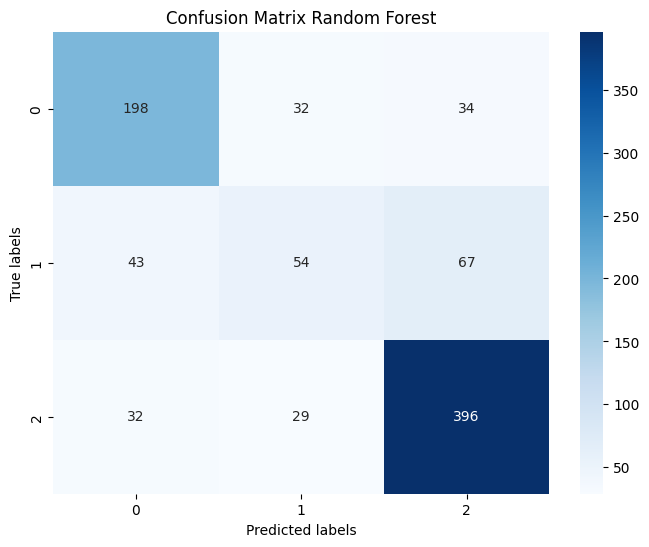

In [79]:
prediction_RF = RF_model.predict(X_test)
report = classification_report(y_test, prediction_RF)
print(report)

conf_matrix = confusion_matrix(y_test, prediction_RF)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       264
           1       0.54      0.24      0.34       164
           2       0.77      0.96      0.85       457

    accuracy                           0.76       885
   macro avg       0.70      0.64      0.65       885
weighted avg       0.73      0.76      0.73       885



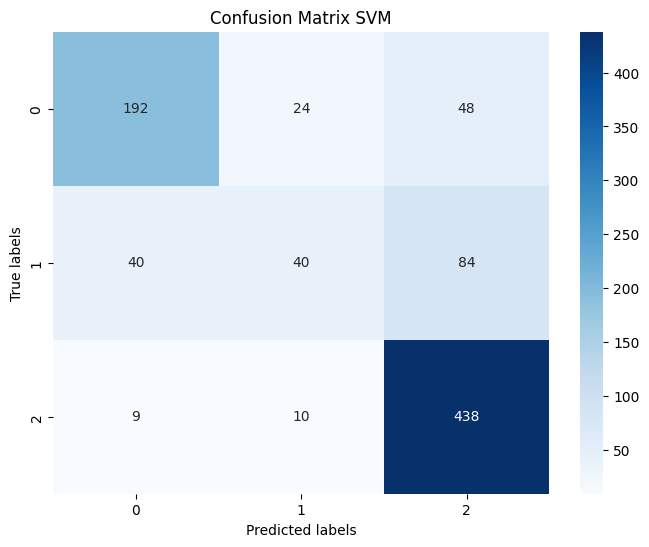

In [80]:
prediction_svm = svm.predict(X_test)
report = classification_report(y_test, prediction_svm)
print(report)

conf_matrix = confusion_matrix(y_test, prediction_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM')
plt.show()

In [81]:
# Simpan model terbaik
dump(svm, 'my_model.joblib')

['my_model.joblib']